In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# import dataset and split into the Training and Test set
df = pd.read_csv('mnist_binary.csv')
print('The shape of raw data: ', df.shape)
X_sk = df.iloc[:, 1:].values
y_sk = df.iloc[:, 0].values
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X_sk, y_sk, test_size = 0.2, random_state = 0)
print('The shape of Training data: ',X_train_sk.shape, y_train_sk.shape)
print('The shape of Test data: ',X_test_sk.shape, y_test_sk.shape)
print('X_train_sk', X_train_sk[:2])

The shape of raw data:  (10000, 785)
The shape of Training data:  (8000, 784) (8000,)
The shape of Test data:  (2000, 784) (2000,)
X_train_sk [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


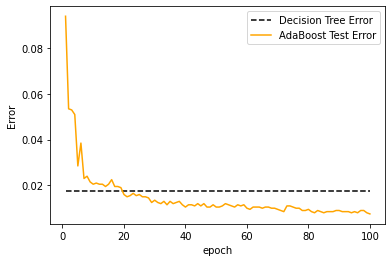

In [3]:
# Training 
clf = AdaBoostClassifier(n_estimators=100,algorithm='SAMME.R')
clf.fit(X_train_sk, y_train_sk)
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_sk,  y_train_sk)
dt_err = 1.0 - dt.score(X_test_sk, y_test_sk)

# Test and compare to the decision tree
fig = plt.figure()
plt.rcParams['font.sans-serif'] = ['SimHei']
ax = fig.add_subplot(111)
ax.plot([1,100],[dt_err]*2,'k--', label=u'Decision Tree Error')
clf_err = np.zeros((100,))
for i, y_pred in enumerate(clf.staged_predict(X_test_sk)):
    clf_err[i]=zero_one_loss(y_pred, y_test_sk)
ax.plot(np.arange(100)+1, clf_err, label='AdaBoost Test Error', color='orange')
ax.set_xlabel('epoch')
ax.set_ylabel('Error')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()

In [4]:
# Test
y_pred = clf.predict(X_test_sk)

In [5]:
# Other Evaluation Metrics
mse = np.sum(np.power(y_pred - y_test_sk,2))/(len(X_test_sk))
rmse = np.sqrt(mse)
R2_test = 1 - np.sum(np.power(y_pred - y_test_sk,2))/np.sum(np.power(np.mean(y_test_sk) - y_test_sk,2))
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R2_test = ', R2_test)
print('accuracy = ', accuracy_score(y_test_sk, y_pred))
print('precision = ', precision_score(y_test_sk, y_pred))
print('recall = ', recall_score(y_test_sk, y_pred))
print('F1 = ', f1_score(y_test_sk, y_pred))

MSE =  0.0075
RMSE =  0.08660254037844387
R2_test =  0.9181186951395257
accuracy =  0.9925
precision =  0.994447529150472
recall =  0.9972160356347439
F1 =  0.9958298582151793


fpr:[0.         0.04901961 1.        ]
tpr:[0.         0.99721604 1.        ]
thresholds:[2 1 0]
AUC面积值： 0.9740982138958032
AUC面积得分： 0.9740982138958032


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/ubuntu/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from current font.
  fig.canvas.pr

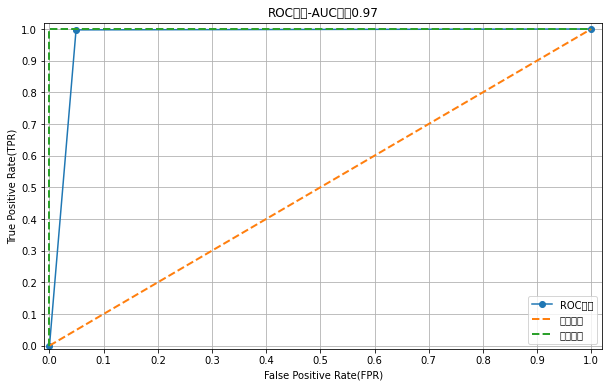

In [6]:
# ROC AUC
#返回ROC曲线相关值。返回FPR,TPR与阈值，当分值达到阈值时，将样本判定为正类，否则判定为负类。
#y_true：二分类的标签值（真实值）
#y_score：每个标签（数据）的分值或概率值。当该值达到阈值时，判定为正例，否则判定为负例。
#在实际模型评估时，该值往往通过决策函数（decision_function）或概率函数（predict_proba）获得
#pos_label：指定正例的标签值
fpr, tpr, thresholds = roc_curve(y_test_sk, y_pred, pos_label=1)
print(f'fpr:{fpr}')
print(f'tpr:{tpr}')
print(f'thresholds:{thresholds}')
#auc与roc_auc_score函数都可以返回auc面积值，但是注意，两个函数的参数是不同的
print('AUC面积值：', auc(fpr, tpr))
print('AUC面积得分：', roc_auc_score(y_true=y_test_sk, y_score=y_pred))

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, ls='-', marker='o', label='ROC曲线')
plt.plot([0,1], [0,1], lw=2, ls='--', label='随机猜想')
plt.plot([0,0,1], [0,1,1], lw=2, ls='--', label='完美预测')
plt.xlim(-0.01, 1.02)
plt.ylim(-0.01, 1.02)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title(f'ROC曲线-AUC值为{auc(fpr, tpr):.2f}')
plt.grid()
plt.legend()